In [118]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#$pip install vaderSentiment

In [37]:
sid = SentimentIntensityAnalyzer()

In [38]:
def get_sentiment(row, **kwargs):
    sentiment_score = sid.polarity_scores(row)
    compound_meter = round((sentiment_score['compound'] * 10), 2)
    return compound_meter

In [49]:
file_list = []

def file_grabber(directory):
    files = os.listdir(directory)
    for file in files:
        if file.endswith('.csv'):
            file_list.append(file)

file_grabber('data/joined_ent_df/')

In [50]:
file_list

['mlb_df.csv',
 'spain_df.csv',
 'nyc_df.csv',
 'obama_df.csv',
 'nhl_df.csv',
 'trump_df.csv',
 'eu_df.csv',
 'china_df.csv',
 'whitehouse_df.csv',
 'cdc_df.csv',
 'italy_df.csv',
 'nba_df.csv',
 'boris_df.csv',
 'congress_df.csv',
 'nhs_df.csv',
 'pelosi_df.csv',
 'usa_df.csv',
 'who_df.csv',
 'fifa_df.csv',
 'nfl_df.csv',
 'fauci_df.csv']

In [41]:
for file in tqdm(file_list):
    df = pd.read_pickle('data/joined_ent_df/'+file)
    df['entity'] = file.strip('_df.csv')
    df['sentiment'] = df.full_text.apply(get_sentiment, k='compound')
    df.to_csv('data/sentimentals/'+file, index=False)

100%|██████████| 21/21 [35:16<00:00, 100.81s/it]


In [51]:
def no_retweets_allowed(list_of_files):
    for file in tqdm(list_of_files):
        df = pd.read_pickle('data/joined_ent_df/'+file)
        df = df[~df['full_text'].str.contains('RT @', na=False)]
        df['entity'] = file.strip('_df.csv')
        df['sentiment'] = df.full_text.apply(get_sentiment, k='compound')
        df.to_csv('data/sentimentals_orig/'+file, index=False)

In [52]:
no_retweets_allowed(file_list)

100%|██████████| 21/21 [27:04<00:00, 77.36s/it] 


In [3]:
def entity_quick_look(ent):
    df = pd.read_csv('data/sentimentals/'+str(ent)+'_df.csv')
    return df.groupby('week').describe()

In [77]:
entity_quick_look('pelosi')

sentiment                                                      
         count      mean       std   min     25%    50%    75%   max
week                                                                
5         26.0 -3.315000  4.321924 -7.63 -7.6300 -4.210  0.000  6.71
6          9.0  0.600000  5.900394 -9.29 -3.1800  0.000  2.960  8.59
7          3.0 -0.200000  6.672248 -6.97 -3.4850  0.000  3.185  6.37
8          1.0  2.960000       NaN  2.96  2.9600  2.960  2.960  2.96
9        774.0 -1.704160  3.396877 -9.10 -2.9600  0.000  0.000  7.27
10       217.0  2.473456  3.221994 -9.10  3.1800  4.000  4.000  8.21
11      7774.0  0.527291  5.559283 -9.79 -4.1275  0.000  5.090  9.75
12      7757.0 -0.706406  5.029258 -9.88 -4.2100 -0.750  3.610  9.84
13     17240.0 -0.957376  5.208826 -9.92 -5.6500  0.000  3.610  9.80
14      9234.0 -1.056396  4.955562 -9.87 -5.2700  0.000  2.760  9.91
15      3488.0 -1.008297  5.258709 -9.89 -5.7200  0.000  3.340  9.96
16      9756.0  0.158868  4.650293 -9.83 -3.7400  2.730  2.730  9.94
17      3946.0 -1.485172  5.312728 -9.77 -6.3350 -1.285  2.960  9.65
18      1779.0 -0.851293  5.532737 -9.89 -5.8600  0.000  3.820  9.61

In [78]:
entity_quick_look('nba')

sentiment                                                      
         count      mean       std   min    25%    50%     75%   max
week                                                                
3         12.0  2.385000  1.438209  0.00  2.385  3.180  3.1800  3.18
4          4.0 -1.102500  4.282020 -5.89 -3.520 -1.365  1.0525  4.21
5       1928.0 -0.100405  4.973883 -9.60 -2.500  1.030  3.1800  9.41
6        283.0 -0.888304  4.470898 -9.29 -4.030  0.000  0.0000  9.27
7        296.0 -1.878851  4.068301 -9.27 -5.260 -2.135  0.0000  9.00
8        384.0  0.523698  3.959983 -8.75 -1.990  0.000  3.1800  9.31
9        751.0 -0.662370  3.752777 -9.64 -3.570  0.000  0.0000  9.27
10      1339.0 -0.141591  4.528594 -9.53 -4.010  0.000  4.0200  9.32
11     30663.0  0.521880  4.420532 -9.90 -2.500  0.000  3.6100  9.98
12     16850.0  0.599162  4.788797 -9.78 -2.960  0.000  4.5775  9.90
13     14181.0  0.804941  4.562560 -9.79 -2.650  0.000  4.4000  9.91
14     10165.0  0.674241  4.802468 -9.92 -2.760  0.000  4.6500  9.94
15      5172.0  0.950265  5.108127 -9.91 -2.960  0.000  5.2700  9.96
16      4739.0  1.265554  4.954994 -9.88 -2.260  0.000  5.2750  9.88
17      4738.0  1.001758  5.056088 -9.88 -2.960  0.000  5.2700  9.91
18      2335.0  1.240989  4.940359 -9.71 -2.020  0.000  5.5600  9.80

In [79]:
entity_quick_look('who')

sentiment                                                    
         count      mean       std   min   25%   50%    75%    max
week                                                              
1          5.0 -6.024000  4.247220 -8.70 -7.65 -7.65 -7.650   1.53
2          4.0  0.000000  0.000000  0.00  0.00  0.00  0.000   0.00
3        667.0  1.729955  3.414342 -8.05 -0.52  3.18  3.180   9.08
4        308.0 -2.433669  4.299338 -9.39 -5.57 -4.77  0.000   9.18
5      68897.0  0.496707  4.457766 -9.88 -2.73  0.00  4.020   9.89
6      60725.0 -2.672735  4.474020 -9.89 -6.60 -3.18  0.000   9.89
7      24809.0 -0.654614  4.445839 -9.81 -4.02  0.00  2.500   9.91
8      32076.0 -0.765073  4.678252 -9.95 -4.94  0.00  3.180   9.94
9      55355.0 -0.304009  4.108263 -9.86 -3.61  0.00  2.405   9.86
10    128971.0 -0.120095  4.255712 -9.94 -3.95  0.00  3.180   9.87
11    375406.0  0.168017  4.687893 -9.92 -3.27  0.00  3.820   9.99
12    535952.0  0.242576  5.073398 -9.99 -4.02  0.00  4.400   9.99
13    545527.0  0.114010  5.084267 -9.97 -4.21  0.00  4.400   9.99
14    430985.0 -0.002839  5.247380 -9.94 -4.71  0.00  4.530   9.97
15    140314.0  0.646558  5.653474 -9.97 -4.40  0.00  5.570   9.99
16    143352.0  0.263800  5.579220 -9.92 -4.77  0.00  5.110  10.00
17    116180.0  0.519552  5.631859 -9.98 -4.40  0.00  5.570  10.00
18     61190.0  0.616707  5.654318 -9.92 -4.39  0.00  5.720   9.98
51         1.0  0.000000       NaN  0.00  0.00  0.00  0.000   0.00

In [80]:
entity_quick_look('cdc')

sentiment                                                      
         count      mean       std   min     25%   50%     75%   max
week                                                                
2          3.0  0.000000  0.000000  0.00  0.0000  0.00  0.0000  0.00
3         16.0 -2.530000  4.340363 -5.27 -5.2700 -5.02  0.5200  8.59
4          3.0 -0.516667  7.462241 -7.72 -4.3650 -1.01  3.0850  7.18
5        904.0  1.480874  4.239842 -9.51  0.0000  0.00  6.3700  9.02
6        163.0 -1.588712  4.389419 -9.83 -4.9800 -0.77  0.0000  8.50
7        142.0 -1.089014  4.634496 -9.12 -4.5900  0.00  2.7025  8.66
8        284.0 -0.216585  4.120450 -9.58 -2.9925  0.00  1.8475  8.93
9        582.0 -0.459313  3.574717 -9.57 -0.2600  0.00  0.2600  9.00
10       398.0 -0.153869  4.360093 -9.55 -3.4000  0.00  2.9600  9.83
11     22887.0 -0.103849  5.201906 -9.89 -4.5200  0.00  4.2100  9.87
12     25851.0  0.134593  5.034947 -9.84 -3.8800  0.00  4.3500  9.88
13     23569.0  0.407985  4.988807 -9.90 -3.4100  0.00  4.4000  9.90
14     21998.0  0.354822  5.065211 -9.89 -3.5600  0.00  4.3675  9.91
15     15803.0  0.578515  5.226392 -9.97 -3.4000  0.00  4.8800  9.85
16     15224.0  0.275723  5.105250 -9.94 -3.8100  0.00  4.2100  9.88
17     16372.0  0.084730  5.183446 -9.88 -4.1825  0.00  4.2100  9.92
18      8796.0  0.400716  5.101435 -9.84 -3.4000  0.00  4.5200  9.88

In [81]:
entity_quick_look('fauci')

sentiment                                                      
         count      mean       std   min     25%   50%     75%   max
week                                                                
5         28.0 -0.116071  5.047604 -8.27  0.0000  0.00  0.9100  7.88
6          2.0 -4.630000  6.547809 -9.26 -6.9450 -4.63 -2.3150  0.00
7          3.0 -1.856667  4.140004 -6.60 -3.3000  0.00  0.5150  1.03
8          6.0  2.455000  5.418907 -6.71  0.7950  3.18  5.3850  8.96
9          5.0  3.132000  2.989962  0.00  0.0000  4.21  4.8500  6.60
10         7.0 -0.110000  0.607481 -1.28 -0.1300  0.00  0.0000  0.77
11      3700.0 -0.340497  5.111170 -9.83 -4.7700  0.00  4.0025  9.75
12      7464.0  0.187296  4.968930 -9.80 -3.7700  0.00  4.2100  9.80
13     12399.0  0.239536  4.920873 -9.81 -3.5300  0.00  4.4000  9.94
14      8822.0 -0.528331  5.063725 -9.89 -4.7700  0.00  3.6100  9.90
15      8394.0 -0.554744  4.962721 -9.83 -4.7700  0.00  3.4650  9.94
16      8772.0 -0.714096  5.005789 -9.94 -5.0325  0.00  3.4000  9.86
17      5427.0 -0.276851  5.133424 -9.81 -4.7700  0.00  4.0200  9.92
18      3444.0 -0.086635  5.104286 -9.81 -4.2100  0.00  4.3075  9.82

In [82]:
entity_quick_look('usa')

sentiment                                                      
          count      mean       std    min     25%   50%   75%    max
week                                                                 
1           1.0  3.590000       NaN   3.59  3.5900  3.59  3.59   3.59
2          17.0  1.323529  2.100532  -1.53  0.0000  3.18  3.18   3.18
3          53.0 -0.728868  3.663170  -6.71 -3.6100  0.00  0.26   8.48
4         648.0 -0.375957  4.724828  -9.31 -3.8200  0.00  4.02   8.39
5      141688.0 -0.865020  4.450923  -9.94 -4.4000  0.00  1.78   9.96
6       98416.0 -0.749700  4.239411  -9.92 -3.8200  0.00  1.28   9.88
7       91210.0 -0.683822  4.105415  -9.95 -4.1800  0.00  1.40   9.94
8       93711.0 -0.602350  4.038139  -9.95 -3.8200  0.00  1.40   9.94
9      129544.0 -1.358130  4.327143  -9.92 -5.2500  0.00  0.00   9.97
10     279595.0 -0.423313  4.025082  -9.95 -2.9600  0.00  1.78   9.96
11     722489.0  0.107344  4.803906  -9.96 -3.7200  0.00  3.86  10.00
12    1186304.0  0.558456  5.080331  -9.99 -3.6100  0.00  4.77  10.00
13    1209069.0  0.445777  5.041264 -10.00 -3.6100  0.00  4.59   9.99
14     972833.0  0.198406  5.025698  -9.99 -3.8200  0.00  4.21  10.00
15     364408.0  0.841235  5.357212  -9.96 -3.4725  0.00  5.51  10.00
16     347304.0  0.689094  5.338761  -9.99 -3.6100  0.00  5.24   9.99
17     330618.0  0.846382  5.335899 -10.00 -3.4000  0.00  5.42  10.00
18     190737.0  0.954289  5.293786  -9.94 -3.1800  0.00  5.54   9.99
49          1.0  4.200000       NaN   4.20  4.2000  4.20  4.20   4.20
51          1.0  0.000000       NaN   0.00  0.0000  0.00  0.00   0.00

In [83]:
entity_quick_look('obama')

sentiment                                                       
         count      mean       std   min     25%    50%     75%   max
week                                                                 
5         27.0 -0.717037  4.175812 -8.48 -0.8800  0.000  0.0000  7.25
6          4.0 -0.290000  6.124720 -8.07 -2.0175  0.000  1.7275  6.91
7          5.0  2.242000  3.186035  0.00  0.0000  0.000  4.4000  6.81
8         12.0  0.504167  4.945125 -8.69 -3.0825  1.805  3.8200  6.37
9         17.0  0.296471  4.883704 -8.35 -3.8200  0.000  3.6100  8.06
10        31.0 -2.837742  4.112096 -9.08 -5.5600 -2.560  0.0000  6.25
11      6328.0 -2.032649  5.441211 -9.89 -7.0000 -2.730  2.0200  9.87
12      5085.0 -1.144012  5.564926 -9.87 -6.2500 -0.770  3.6100  9.86
13      4678.0 -0.994094  5.576971 -9.78 -6.1275  0.000  3.9975  9.91
14      5104.0 -1.687700  5.439838 -9.82 -6.6425 -1.950  2.6475  9.95
15      4109.0 -0.819533  5.442417 -9.89 -5.8300  0.000  3.8200  9.80
16      4552.0 -0.435727  5.666974 -9.89 -5.7000  0.000  4.4050  9.98
17      2641.0 -0.771897  5.555019 -9.85 -5.7200  0.000  3.9700  9.94
18      1431.0 -1.430678  5.702171 -9.86 -6.9100 -1.010  3.4000  9.86

In [84]:
entity_quick_look('nyc')

sentiment                                                       
         count      mean       std    min    25%    50%     75%   max
week                                                                 
3         28.0  2.727143  1.429688   0.00  3.180  3.180  3.1800  6.40
4          6.0 -3.010000  3.853144  -9.55 -4.795 -1.395 -0.1925  0.00
5        594.0 -0.114343  4.037656  -9.16 -3.820  0.000  3.1800  9.22
6       6271.0 -0.214974  1.692837  -9.54  0.000  0.000  0.0000  9.42
7        736.0 -3.969158  3.822561  -9.48 -7.780 -5.420 -1.7800  8.75
8       1400.0 -5.474900  3.308099  -9.26 -7.270 -7.270 -4.5900  8.44
9        702.0 -1.338305  3.924291  -9.26 -4.210 -1.500  0.0000  9.75
10      5950.0 -0.116508  2.793918  -9.58  0.000  0.000  0.0000  9.78
11     19847.0  0.180770  4.605595  -9.87 -3.180  0.000  3.9050  9.84
12     45262.0  0.258261  4.503590  -9.90 -3.180  0.000  3.8000  9.92
13     58460.0  0.024041  4.889331  -9.96 -3.820  0.000  4.0200  9.96
14     46381.0  0.268740  5.023662 -10.00 -3.820  0.000  4.4000  9.98
15     29884.0  0.106078  5.064248  -9.90 -3.870  0.000  4.2100  9.96
16     21562.0  0.244898  5.105908  -9.94 -3.820  0.000  4.4000  9.99
17     20553.0  0.569240  5.120409  -9.99 -3.410  0.000  4.9400  9.97
18     12295.0  0.235203  5.163958  -9.87 -3.820  0.000  4.5000  9.88

In [85]:
entity_quick_look('eu')

sentiment                                                     
         count      mean       std    min   25%   50%    75%    max
week                                                               
1         52.0 -7.336346  3.934203  -9.09 -9.09 -9.09 -9.090   5.40
2         30.0 -3.277333  5.412859  -9.09 -9.09 -0.52  0.000   8.19
3        202.0 -0.913317  3.479999  -8.05 -2.73 -2.73  1.245   8.59
4        197.0 -0.812183  3.617679  -8.18 -3.82  0.00  1.030   9.68
5      41865.0 -0.861700  4.142679  -9.92 -4.02  0.00  1.280   9.91
6      22845.0 -1.144402  4.141507  -9.79 -4.77  0.00  0.000   9.92
7      24393.0 -0.471778  3.930112  -9.95 -3.26  0.00  2.060   9.95
8      31033.0 -0.966729  3.716366  -9.95 -3.40  0.00  0.000   9.94
9      41453.0 -0.490335  3.407798  -9.87 -2.50  0.00  0.000   9.95
10     58655.0 -0.819675  4.250663  -9.95 -4.65  0.00  2.260   9.77
11    132713.0 -0.453797  4.814088  -9.97 -4.21  0.00  3.820   9.99
12    204110.0  0.112107  4.706760 -10.00 -3.61  0.00  3.820   9.98
13    183810.0  0.338151  4.794132  -9.98 -3.18  0.00  4.210   9.98
14    141949.0  0.398453  4.809818  -9.97 -3.40  0.00  4.210  10.00
15     66067.0  0.796384  5.027709  -9.93 -2.96  0.00  4.930   9.97
16     61604.0  0.886492  5.012456  -9.93 -2.96  0.00  4.940   9.99
17     61546.0  1.042854  4.990776  -9.93 -2.50  0.00  5.110   9.99
18     34705.0  1.031080  4.999651  -9.92 -2.73  0.00  5.110   9.99
51        14.0  0.000000  0.000000   0.00  0.00  0.00  0.000   0.00

In [42]:
file_list = []

file_grabber('data/sentimentals/')

In [43]:
file_list

['mlb_df.csv',
 'spain_df.csv',
 'nyc_df.csv',
 'obama_df.csv',
 'nhl_df.csv',
 'trump_df.csv',
 'eu_df.csv',
 'china_df.csv',
 'whitehouse_df.csv',
 'cdc_df.csv',
 'italy_df.csv',
 'nba_df.csv',
 'boris_df.csv',
 'congress_df.csv',
 'nhs_df.csv',
 'pelosi_df.csv',
 'usa_df.csv',
 'who_df.csv',
 'fifa_df.csv',
 'nfl_df.csv',
 'fauci_df.csv']

In [47]:
#def no_retweets_allowed(list_of_files):
#    for file in tqdm(list_of_files):
#        df = pd.read_csv('data/sentimentals/'+str(file))
#        df = df[~df['full_text'].str.contains('RT @', na=False)]
#        df.to_csv('data/sentimentals_orig/orig_'+str(file), index=False)

In [58]:
testing = pd.read_csv('data/sentimentals_orig/fifa_df.csv')

In [59]:
testing.head()

,created_at,id,full_text,place,week,week_set_day,entity,sentiment
0,2020-03-12 23:28:53+00:00,1.238246e+18,Can someone get me the odds on who’s gonna win...,NaN,11,2020-03-18,ifa,5.86
1,2020-03-13 04:31:15+00:00,1.238322e+18,Kenya premier league and #BBI meeting should b...,NaN,11,2020-03-18,ifa,-2.50
2,2020-02-14 15:59:53+00:00,1.228348e+18,China women's soccer coach lauds team's braver...,NaN,7,2020-02-19,ifa,-1.28
3,2020-03-23 22:32:53+00:00,1.242218e+18,FIFA boss looking at soccer reform after coron...,NaN,13,2020-04-01,ifa,-6.25
4,2020-04-04 11:24:30+00:00,1.246398e+18,Football focus is showing back garden football...,NaN,14,2020-04-08,ifa,2.26


In [177]:
def entity_sent_comparer(ent):
    df = pd.read_csv('data/sentimentals_orig/'+str(ent)+'_df.csv')
    df = df.groupby('week').median()#.drop(columns=['id'])
    df2 = pd.read_csv('data/sentimentals/'+str(ent)+'_df.csv')
    df2 = df2.groupby('week').median()#.drop(columns=['id'])
    df = df.merge(df2, on='week')
#    return df
    df['sent_diff'] = df['sentiment_x']-df['sentiment_y']
    df = df.reset_index()
    df['week'] = pd.to_numeric(df['week'], errors='coerce')
    df = df.sort_values('week')
    df = df.dropna()
    fig, ax = plt.subplots(figsize = (11,8))
    sns.lineplot(x='week', y='sent_diff', data=df, ci=None)
    plt.title('Sentiment Change When Including Retweets',fontsize=28, fontweight='bold')
    plt.xlim(0,18)
    plt.xlabel('Week (2020)',fontsize=20, fontweight='bold')
    plt.ylabel('Change in Weekly Sentment',fontsize=20, fontweight='bold')
    plt.savefig('figures/'+str(ent)+'_sent_dif.png', dpi = 250)

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (0,2,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


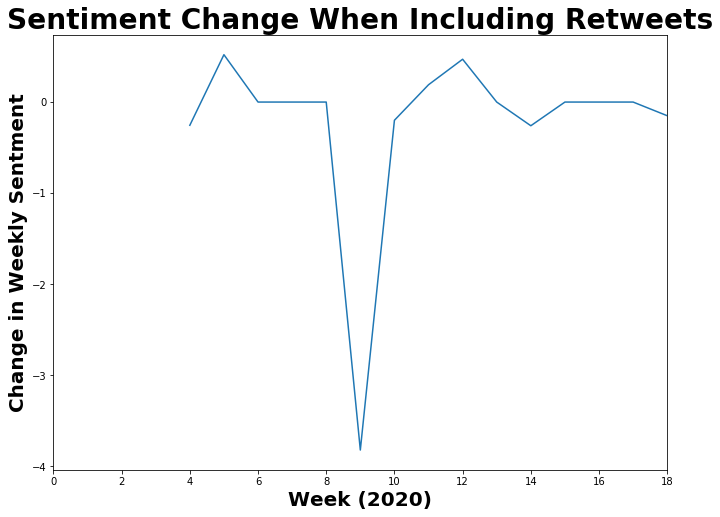

In [179]:
entity_sent_comparer('trump')